In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from helper import readFile
from helper import addBias
from helper import oneHotEncoder
from GDclassifier import GDclassifier
from PCA import PCA

%matplotlib inline

In [2]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw1train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw1dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw1eval_labels.txt', './data/')

# add bias as the first feature
trainFeature = addBias(trainFeature)
devFeature = addBias(devFeature)
evalFeature = addBias(evalFeature)

Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0796855000586  Highest Training Accuracy :  0.934807385457


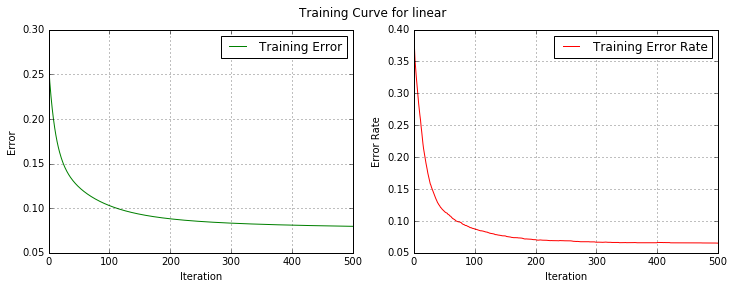

In [3]:
randomSeed = None
# Linear error
linear = GDclassifier(loss='linear', learning_rate=0.01, iteration=500, 
                      C=None, CV=False, showFreq=0, randomSeed=randomSeed)
linear.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
trainMSE_linear, trainAcc_linear, w_linear = linear.getParams()
pcaMSE_linear, pcaAcc_linear, pcaW_linear = linear.getBest('Accuracy')
fig, ax = linear.plot(ylog=False, category='Error Rate', figsize=(12, 4))

Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0539621101345  Highest Training Accuracy :  0.936972874402


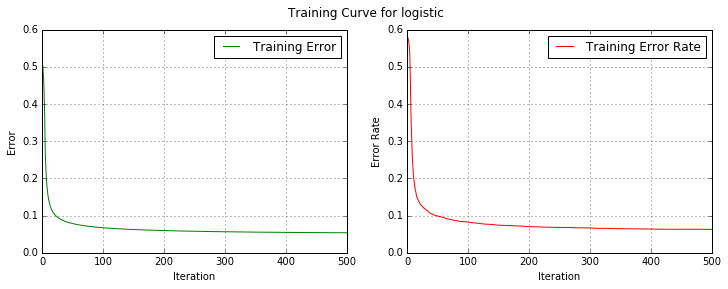

In [4]:
randomSeed = 2012
# Logistic error
logistic = GDclassifier(loss='logistic', learning_rate=0.5, iteration=500, 
                        C=None, CV=False, showFreq=0, randomSeed=randomSeed)
logistic.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
trainMSE_logistic, trainAcc_logistic, w_logistic = logistic.getParams()
pcaMSE_logistic, pcaAcc_logistic, pcaW_logistic = logistic.getBest('Accuracy')
fig, ax = logistic.plot(ylog=False, category='Error Rate', figsize=(12, 4))

Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0228963358055  Highest Training Accuracy :  0.918965124231


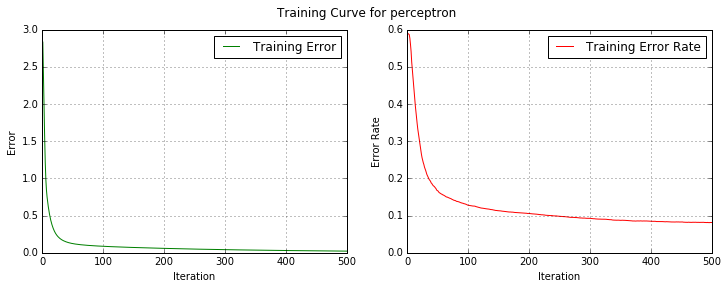

In [5]:
randomSeed = 2015
# Perceptron error
perceptron = GDclassifier(loss='perceptron', learning_rate=0.05, iteration=500, 
                          C=None, CV=False, showFreq=0, randomSeed=randomSeed)
perceptron.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
trainMSE_perceptron, trainAcc_perceptron, w_perceptron = perceptron.getParams()
pcaMSE_perceptron, pcaAcc_perceptron, pcaW_perceptron = perceptron.getBest('Accuracy')
fig, ax = perceptron.plot(ylog=False, category='Error Rate', figsize=(12, 4))

Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.214124231561  Highest Training Accuracy :  0.928994757237


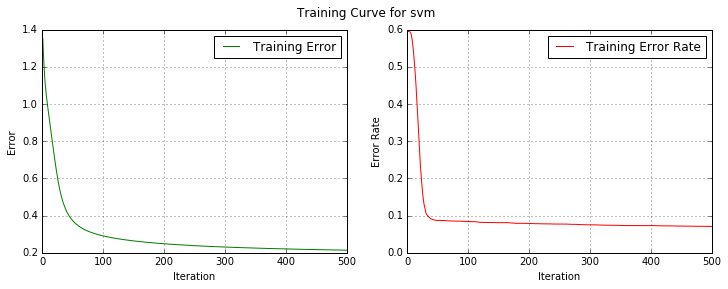

In [6]:
randomSeed = 2016
# SVM error
svm = GDclassifier(loss='svm', learning_rate=0.01, iteration=500, 
                   C=1, CV=False, showFreq=0, randomSeed=randomSeed)
svm.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
trainMSE_svm, trainAcc_svm, w_svm = svm.getParams()
pcaMSE_svm, pcaAcc_svm, pcaW_svm = svm.getBest('Accuracy')
fig, ax = svm.plot(ylog=False, category='Error Rate', figsize=(12, 4))

****************************************
Part 1: Convergence curve of four classifiers


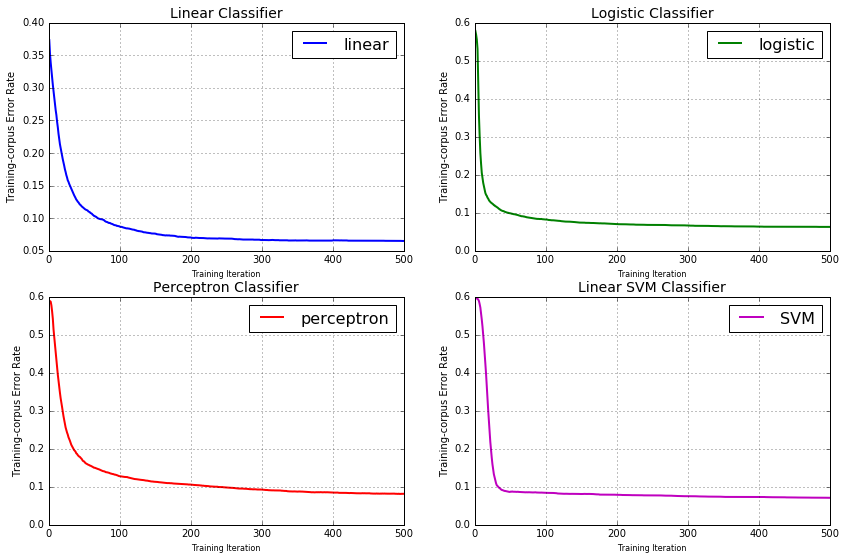

In [7]:
#########################################################
# Part 1: Convergence curve of four classifiers
print('*' * 40)
print('Part 1: Convergence curve of four classifiers')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))
ax[0, 0].plot(range(1, len(trainAcc_linear) + 1),  1 - np.array(trainAcc_linear), 
              'b', linewidth=2, label='linear')
ax[0, 0].set_title('Linear Classifier', fontsize=14)
ax[0, 0].set_xlabel('Training Iteration', fontsize=8)
ax[0, 0].set_ylabel('Training-corpus Error Rate', fontsize=10)
ax[0, 0].legend(loc=1, fontsize=16)
ax[0, 0].grid('on')

ax[0, 1].plot(range(1, len(trainAcc_logistic) + 1), 1 - np.array(trainAcc_logistic), 
              'g', linewidth=2, label='logistic')
ax[0, 1].set_title('Logistic Classifier', fontsize=14)
ax[0, 1].set_xlabel('Training Iteration', fontsize=8)
ax[0, 1].set_ylabel('Training-corpus Error Rate', fontsize=10)
ax[0, 1].legend(loc=1, fontsize=16)
ax[0, 1].grid('on')

ax[1, 0].plot(range(1, len(trainAcc_perceptron) + 1), 1 - np.array(trainAcc_perceptron), 
              'r', linewidth=2, label='perceptron')
ax[1, 0].set_title('Perceptron Classifier', fontsize=14)
ax[1, 0].set_xlabel('Training Iteration', fontsize=8)
ax[1, 0].set_ylabel('Training-corpus Error Rate', fontsize=10)
ax[1, 0].legend(loc=1, fontsize=16)
ax[1, 0].grid('on')

ax[1, 1].plot(range(1, len(trainAcc_svm) + 1), 1 - np.array(trainAcc_svm), 
              'm', linewidth=2, label='SVM')
ax[1, 1].set_title('Linear SVM Classifier', fontsize=14)
ax[1, 1].set_xlabel('Training Iteration', fontsize=8)
ax[1, 1].set_ylabel('Training-corpus Error Rate', fontsize=10)
ax[1, 1].legend(loc=1, fontsize=16)
ax[1, 1].grid('on')

fig.savefig('./result/covergence.pdf')
plt.show()

In [8]:
#########################################################
# Part 2: Error curve for SVM
print('*' * 40)
print('Part 2: Error curve for SVM')

****************************************
Part 2: Error curve for SVM


Reach the Maximum Iteration : 500th Iteration
Best Training Error:  6.65117275392e-05  Highest Training Accuracy :  0.90825165261
Best Development Error:  0.000153215223833  Highest Development Accuracy :  0.862790697674
**************************************************
Current C is  0.0001


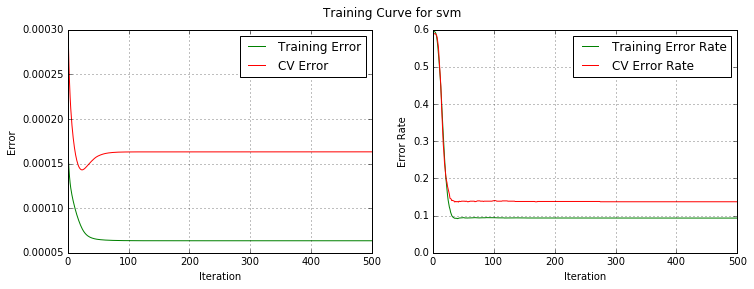

Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.000339282355034  Highest Training Accuracy :  0.927741053111
Best Development Error:  0.000838865619468  Highest Development Accuracy :  0.910852713178
**************************************************
Current C is  0.001


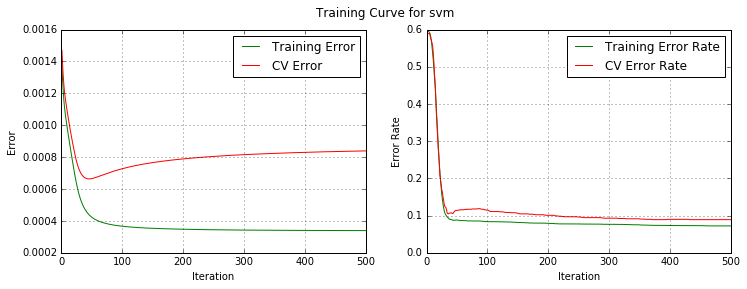

Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.00216952412187  Highest Training Accuracy :  0.937542739913
Best Development Error:  0.00361657904618  Highest Development Accuracy :  0.933333333333
**************************************************
Current C is  0.01


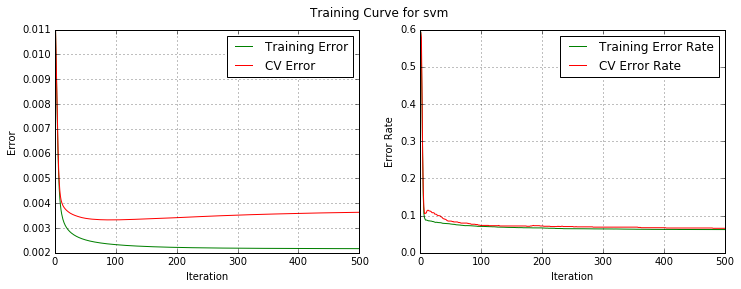

Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0188728934685  Highest Training Accuracy :  0.937770686118
Best Development Error:  0.0208204899884  Highest Development Accuracy :  0.933333333333
**************************************************
Current C is  0.1


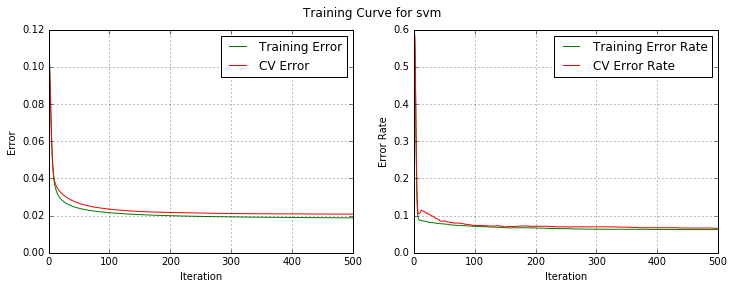

Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.184746778551  Highest Training Accuracy :  0.937656713016
Best Development Error:  0.186790215407  Highest Development Accuracy :  0.934108527132
**************************************************
Current C is  1.0


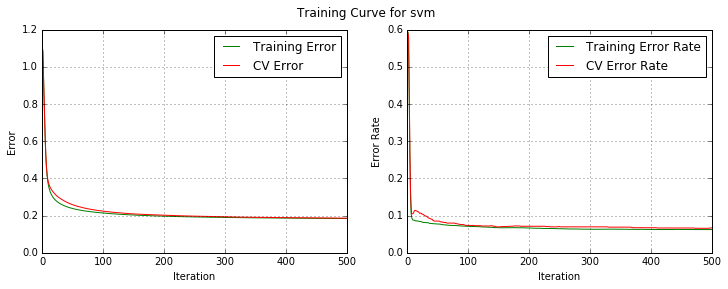

Reach the Maximum Iteration : 500th Iteration
Best Training Error:  1.84418189489  Highest Training Accuracy :  0.937770686118
Best Development Error:  1.84610802933  Highest Development Accuracy :  0.934108527132
**************************************************
Current C is  10.0


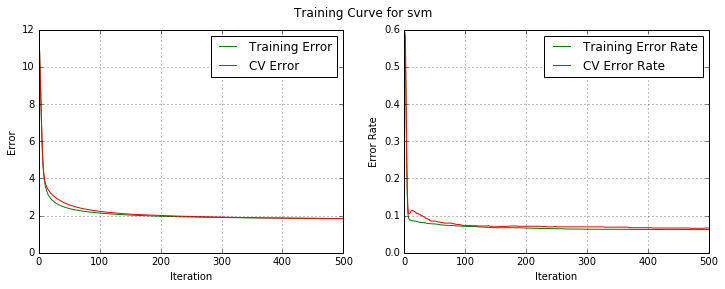

Reach the Maximum Iteration : 500th Iteration
Best Training Error:  18.4381984746  Highest Training Accuracy :  0.937770686118
Best Development Error:  18.4387135308  Highest Development Accuracy :  0.934108527132
**************************************************
Current C is  100


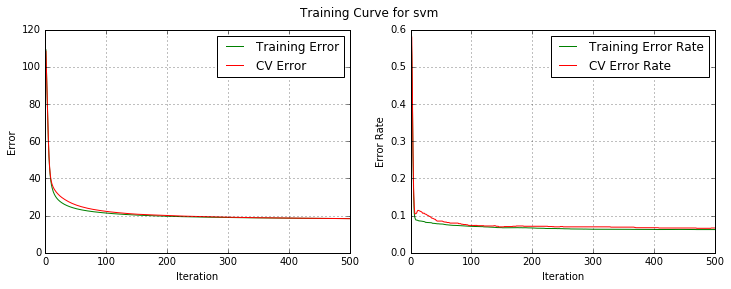

In [9]:
# Test case
randomSeed = 2016
listC = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100]
listRate = [100, 10, 5, 0.5, 0.05, 0.005, 0.0005]
svm_train_Acc = []
svm_dev_Acc = []
for i in range(len(listC)):
    C = listC[i]
    learning_rate = listRate[i]
    svm = GDclassifier(loss='svm', learning_rate=learning_rate, iteration=500, 
                       C=C, CV=True, showFreq=0, randomSeed=randomSeed)
    svm.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
    # find the best parameters
    bestMSE_svm, bestAcc_svm, bestW_svm = svm.getBest('Accuracy')
    devMSE, devAcc = svm.evaluate(devFeature, devLabel, bestW_svm)
    svm_train_Acc.append(bestAcc_svm)
    svm_dev_Acc.append(devAcc)
    
    print('*' * 50)
    print("Current C is ", C)
    fig, ax = svm.plot(ylog=False, category='Error Rate', figsize=(12, 4))
    plt.show()

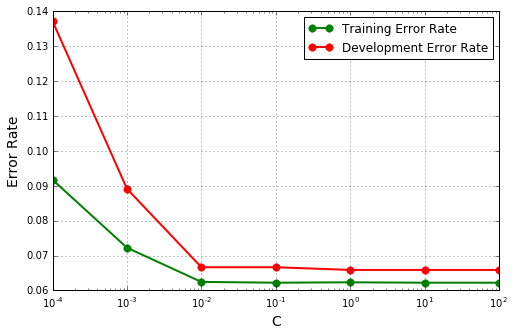

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(listC, 1 - np.array(svm_train_Acc), 'g.-', markersize=15, linewidth=2, label='Training Error Rate')
ax.plot(listC, 1 - np.array(svm_dev_Acc), 'r.-', markersize=15, linewidth=2, label='Development Error Rate')
# ax.set_title('Comparison of SVM Classifier with Different C', fontsize=14)
ax.set_xlabel('C', fontsize=14)
ax.set_ylabel('Error Rate', fontsize=14)
ax.legend(loc=1, fontsize=12)
ax.grid('on')
ax.set_xscale('log')

fig.savefig('./result/svm_comparison1.pdf')

plt.show()

***** 10 0.1
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0248767525212  Highest Training Accuracy :  0.920788693868
Best Development Error:  0.0282095076949  Highest Development Accuracy :  0.909302325581
**************************************************
Current C is  0.1


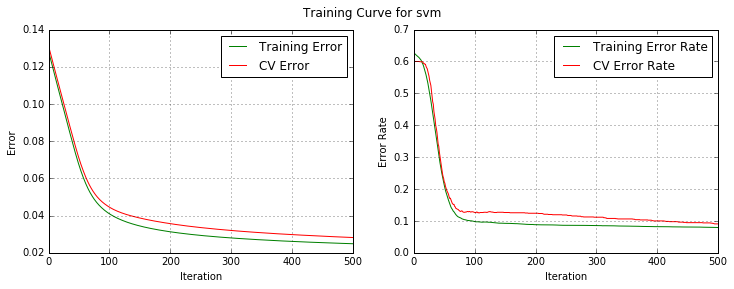

***** 10 0.2
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0438659978673  Highest Training Accuracy :  0.928082972419
Best Development Error:  0.0475027720425  Highest Development Accuracy :  0.922480620155
**************************************************
Current C is  0.2


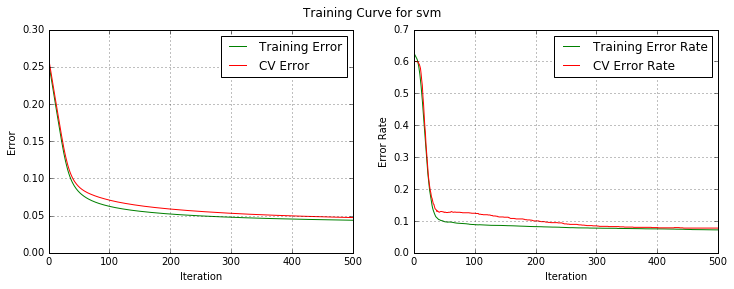

***** 10 0.3
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0619340256063  Highest Training Accuracy :  0.931844084796
Best Development Error:  0.065503098851  Highest Development Accuracy :  0.928682170543
**************************************************
Current C is  0.3


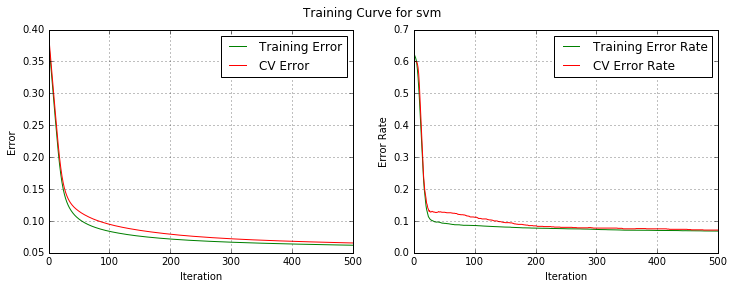

***** 10 0.4
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0806205880781  Highest Training Accuracy :  0.934237519945
Best Development Error:  0.0847516630242  Highest Development Accuracy :  0.928682170543
**************************************************
Current C is  0.4


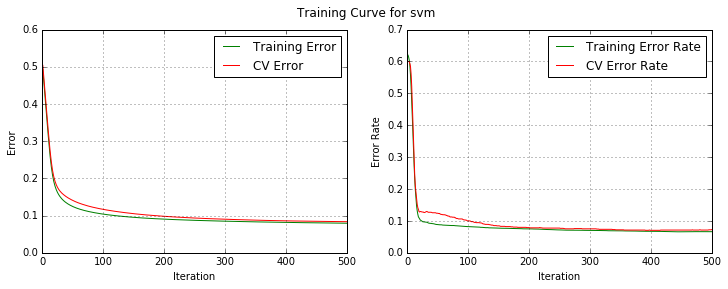

***** 10 0.5
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0973130098049  Highest Training Accuracy :  0.935491224071
Best Development Error:  0.101846381657  Highest Development Accuracy :  0.927131782946
**************************************************
Current C is  0.5


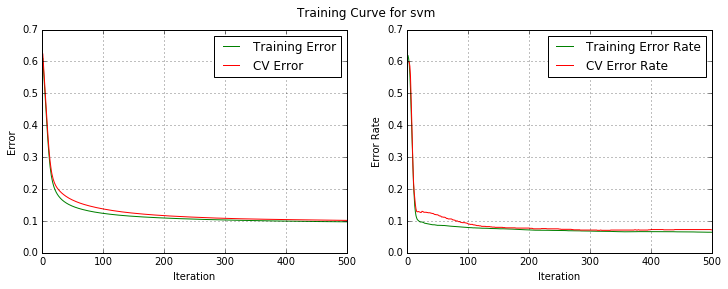

***** 10 0.6
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.114979283444  Highest Training Accuracy :  0.936516981992
Best Development Error:  0.119541052516  Highest Development Accuracy :  0.927906976744
**************************************************
Current C is  0.6


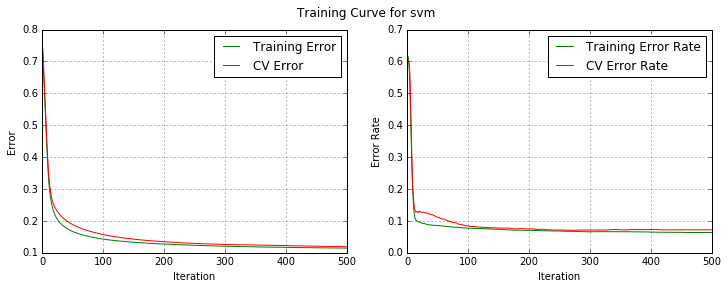

***** 10 0.7
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.132877343976  Highest Training Accuracy :  0.937428766811
Best Development Error:  0.137488431238  Highest Development Accuracy :  0.928682170543
**************************************************
Current C is  0.7


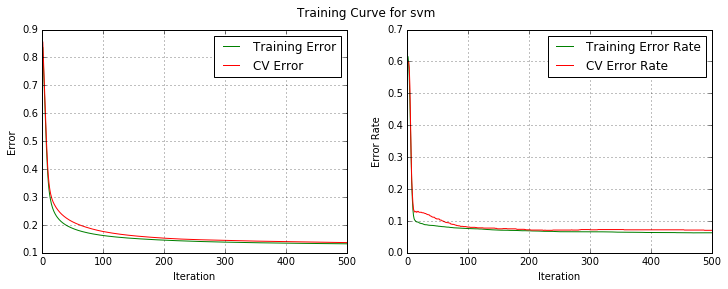

***** 10 0.8
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.149845453108  Highest Training Accuracy :  0.937770686118
Best Development Error:  0.153999871641  Highest Development Accuracy :  0.931782945736
**************************************************
Current C is  0.8


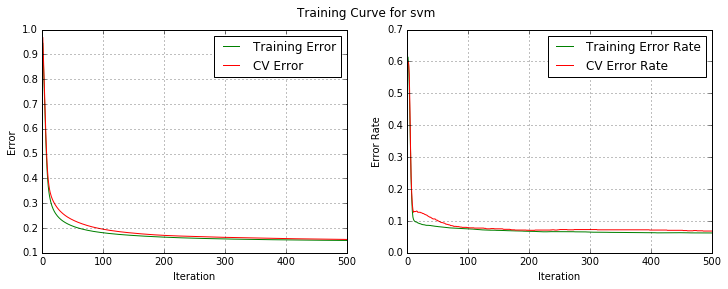

***** 10 0.9
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.167402590847  Highest Training Accuracy :  0.937998632323
Best Development Error:  0.171537897864  Highest Development Accuracy :  0.931007751938
**************************************************
Current C is  0.9


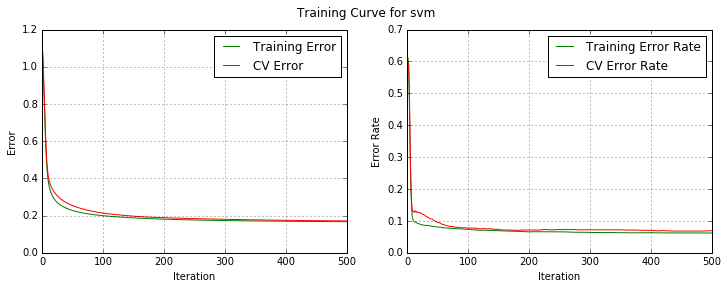

***** 10 1.0
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.185484253765  Highest Training Accuracy :  0.937998632323
Best Development Error:  0.189741683176  Highest Development Accuracy :  0.931007751938
**************************************************
Current C is  1.0


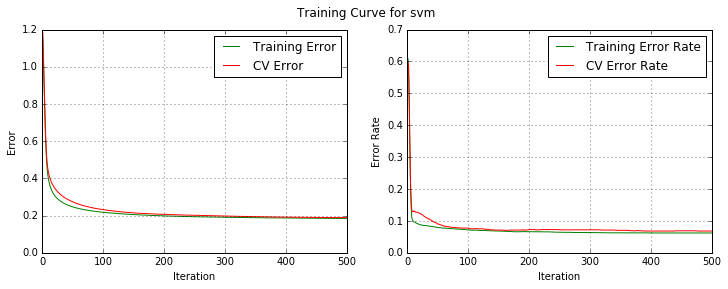

***** 100 0.1
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.024755690944  Highest Training Accuracy :  0.922612263506
Best Development Error:  0.0276018002172  Highest Development Accuracy :  0.91007751938
**************************************************
Current C is  0.1


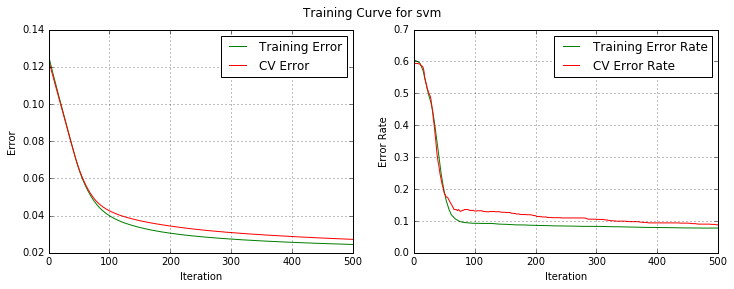

***** 100 0.2
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0437440941635  Highest Training Accuracy :  0.929450649647
Best Development Error:  0.0465340863613  Highest Development Accuracy :  0.92480620155
**************************************************
Current C is  0.2


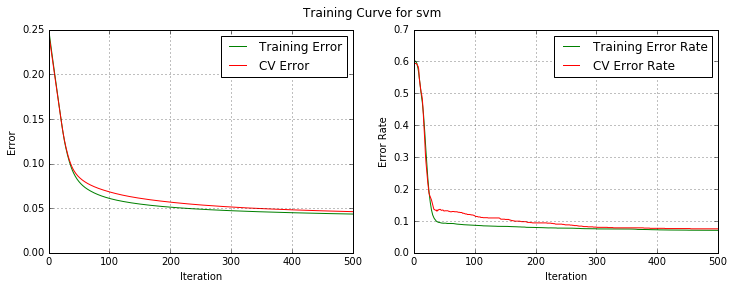

***** 100 0.3
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.061625485119  Highest Training Accuracy :  0.932869842717
Best Development Error:  0.0641330269114  Highest Development Accuracy :  0.927131782946
**************************************************
Current C is  0.3


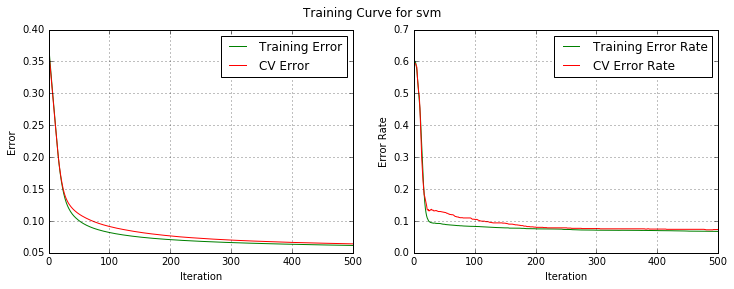

***** 100 0.4
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0807674347544  Highest Training Accuracy :  0.934123546843
Best Development Error:  0.0834887653419  Highest Development Accuracy :  0.927131782946
**************************************************
Current C is  0.4


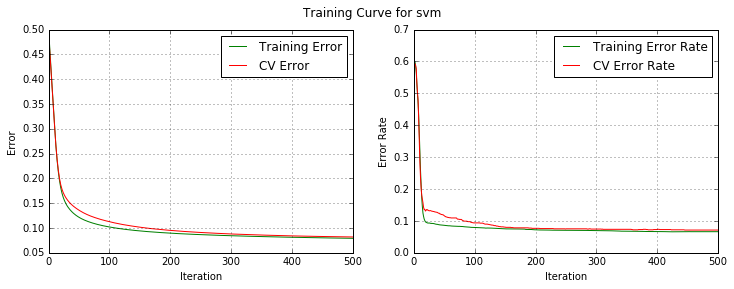

***** 100 0.5
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0969513733032  Highest Training Accuracy :  0.934921358559
Best Development Error:  0.0997730805119  Highest Development Accuracy :  0.927906976744
**************************************************
Current C is  0.5


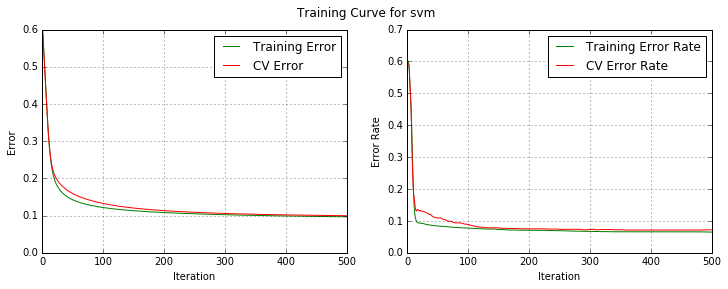

***** 100 0.6
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.114497043993  Highest Training Accuracy :  0.936289035788
Best Development Error:  0.117300321295  Highest Development Accuracy :  0.928682170543
**************************************************
Current C is  0.6


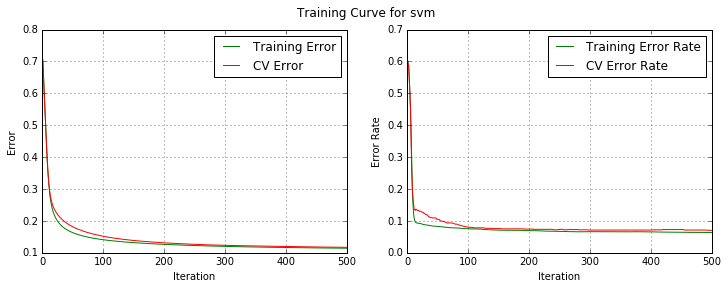

***** 100 0.7
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.132109396078  Highest Training Accuracy :  0.936630955095
Best Development Error:  0.134988273893  Highest Development Accuracy :  0.929457364341
**************************************************
Current C is  0.7


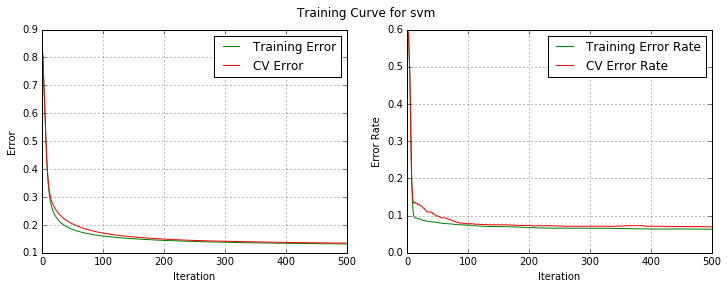

***** 100 0.8
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.149353672134  Highest Training Accuracy :  0.937086847504
Best Development Error:  0.152152605045  Highest Development Accuracy :  0.931782945736
**************************************************
Current C is  0.8


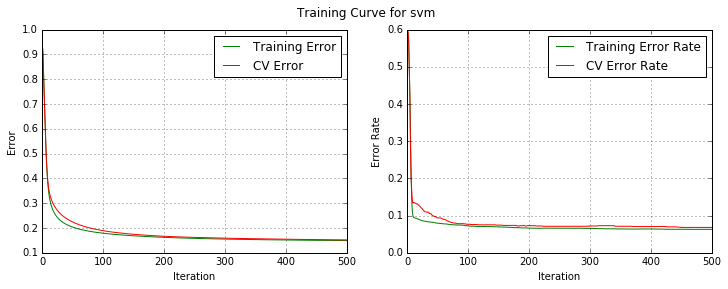

***** 100 0.9
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.166869770099  Highest Training Accuracy :  0.937428766811
Best Development Error:  0.169757620503  Highest Development Accuracy :  0.933333333333
**************************************************
Current C is  0.9


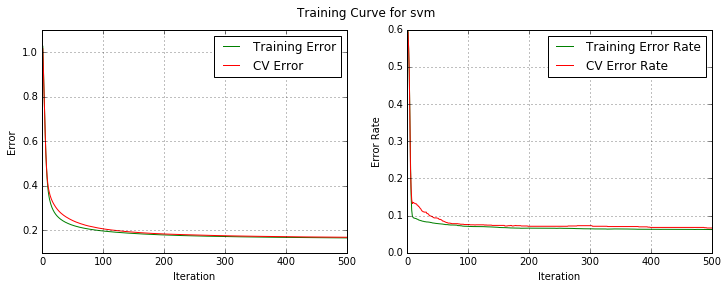

***** 100 1.0
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.184227463602  Highest Training Accuracy :  0.938226578527
Best Development Error:  0.186824206622  Highest Development Accuracy :  0.933333333333
**************************************************
Current C is  1.0


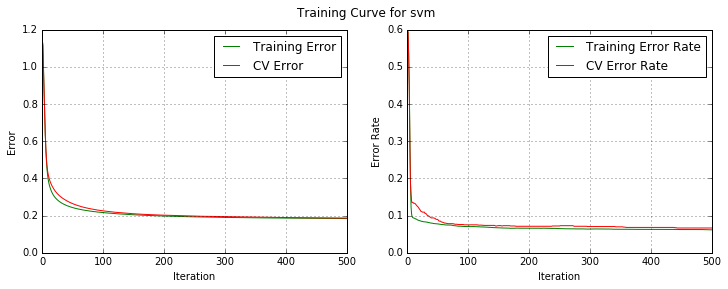

***** 1000 0.1
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0250084986377  Highest Training Accuracy :  0.919990882152
Best Development Error:  0.0275295502696  Highest Development Accuracy :  0.906201550388
**************************************************
Current C is  0.1


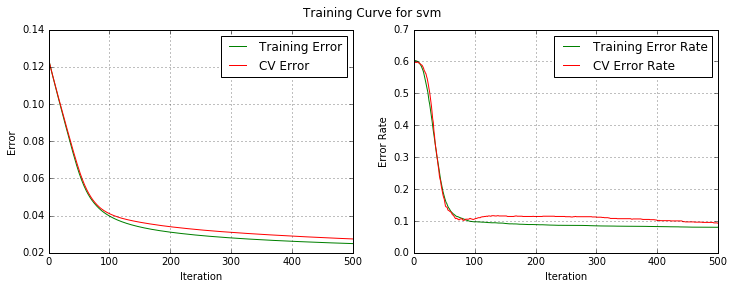

***** 1000 0.2
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.043971149908  Highest Training Accuracy :  0.926373375883
Best Development Error:  0.0464906097933  Highest Development Accuracy :  0.920930232558
**************************************************
Current C is  0.2


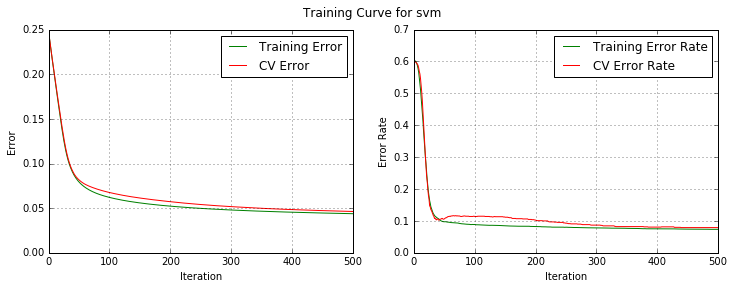

***** 1000 0.3
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0620254914304  Highest Training Accuracy :  0.931844084796
Best Development Error:  0.0642256263145  Highest Development Accuracy :  0.927131782946
**************************************************
Current C is  0.3


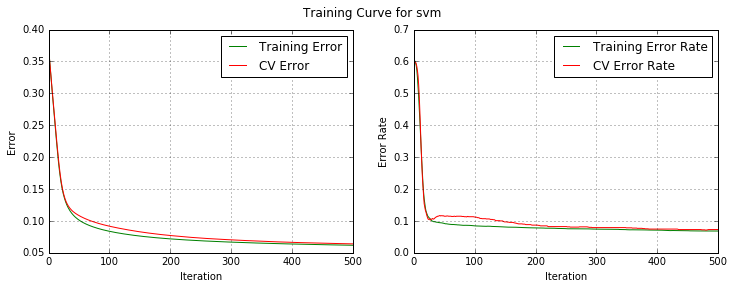

***** 1000 0.4
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0796156534536  Highest Training Accuracy :  0.933781627536
Best Development Error:  0.0817866874786  Highest Development Accuracy :  0.928682170543
**************************************************
Current C is  0.4


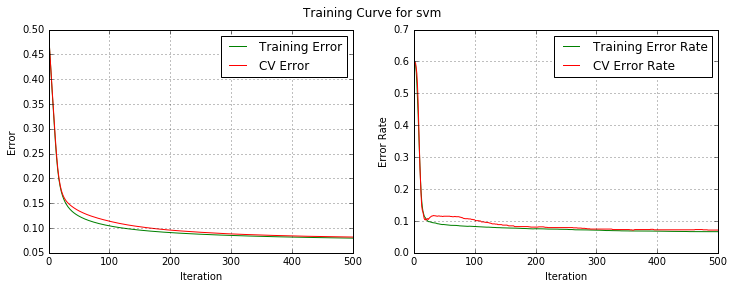

***** 1000 0.5
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0971855272073  Highest Training Accuracy :  0.935263277866
Best Development Error:  0.0993466265301  Highest Development Accuracy :  0.928682170543
**************************************************
Current C is  0.5


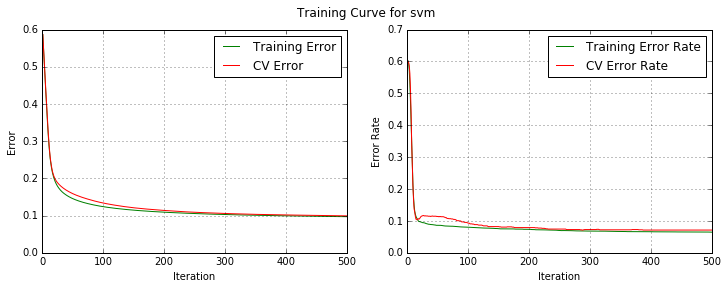

***** 1000 0.6
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.114815477602  Highest Training Accuracy :  0.936630955095
Best Development Error:  0.116741988016  Highest Development Accuracy :  0.93023255814
**************************************************
Current C is  0.6


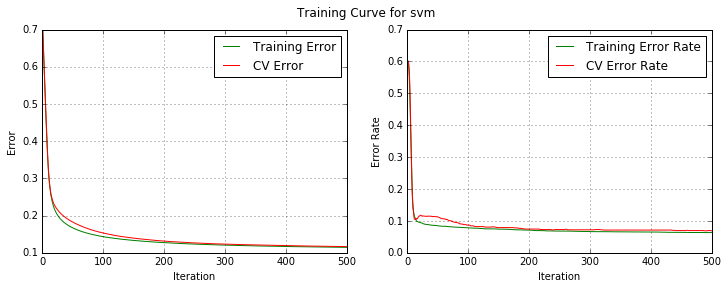

***** 1000 0.7
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.132314789139  Highest Training Accuracy :  0.937542739913
Best Development Error:  0.133876754798  Highest Development Accuracy :  0.931007751938
**************************************************
Current C is  0.7


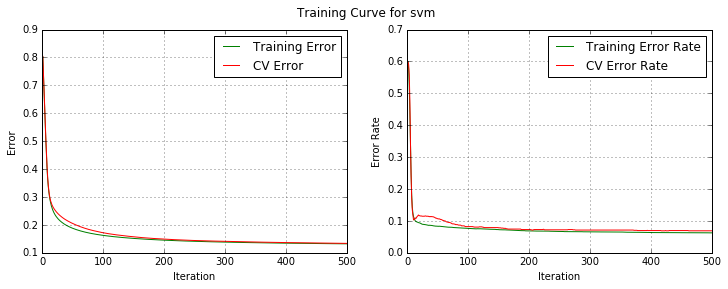

***** 1000 0.8
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.15049499119  Highest Training Accuracy :  0.937770686118
Best Development Error:  0.151907811347  Highest Development Accuracy :  0.931007751938
**************************************************
Current C is  0.8


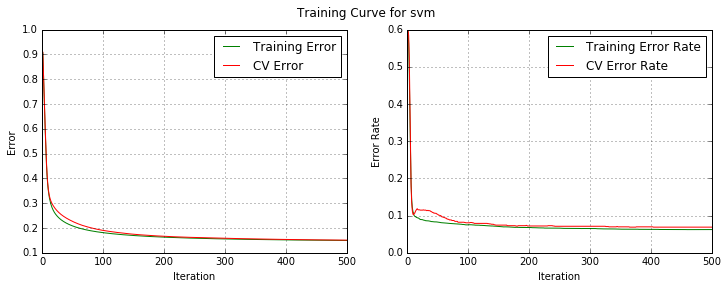

***** 1000 0.9
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.16762859199  Highest Training Accuracy :  0.93834055163
Best Development Error:  0.168609115727  Highest Development Accuracy :  0.931782945736
**************************************************
Current C is  0.9


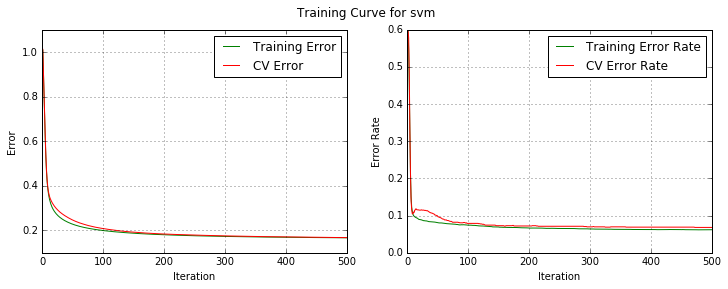

***** 1000 1.0
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.186084306852  Highest Training Accuracy :  0.938454524732
Best Development Error:  0.186935842765  Highest Development Accuracy :  0.931782945736
**************************************************
Current C is  1.0


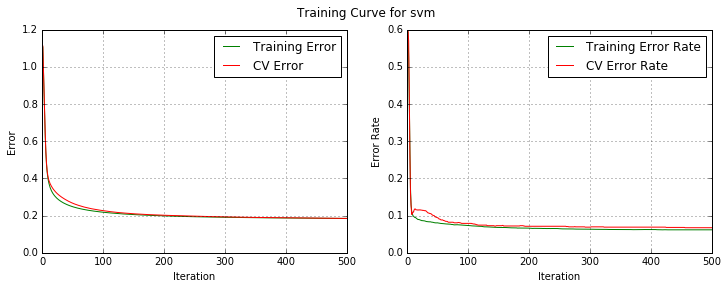

***** 10000 0.1
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0247430924249  Highest Training Accuracy :  0.922612263506
Best Development Error:  0.0282503799524  Highest Development Accuracy :  0.909302325581
**************************************************
Current C is  0.1


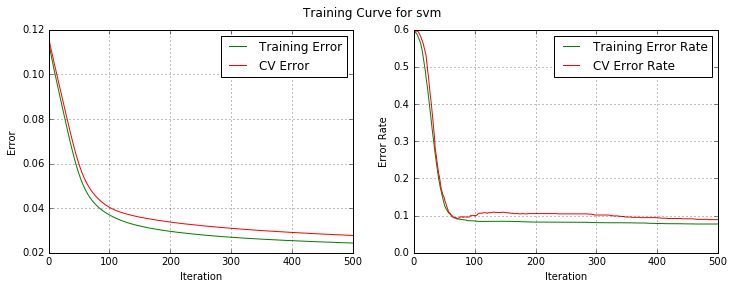

***** 10000 0.2
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0435612704782  Highest Training Accuracy :  0.927968999316
Best Development Error:  0.0474476676938  Highest Development Accuracy :  0.922480620155
**************************************************
Current C is  0.2


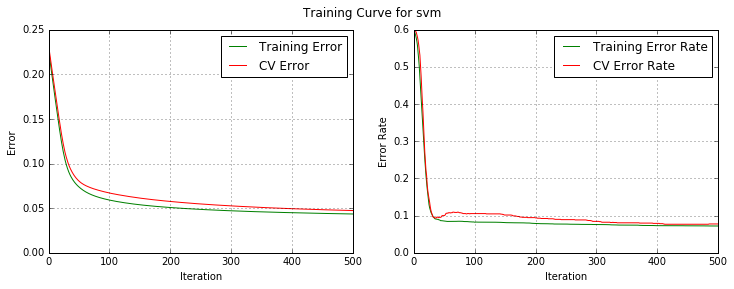

***** 10000 0.3
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.061770752228  Highest Training Accuracy :  0.931958057898
Best Development Error:  0.0656272956695  Highest Development Accuracy :  0.927131782946
**************************************************
Current C is  0.3


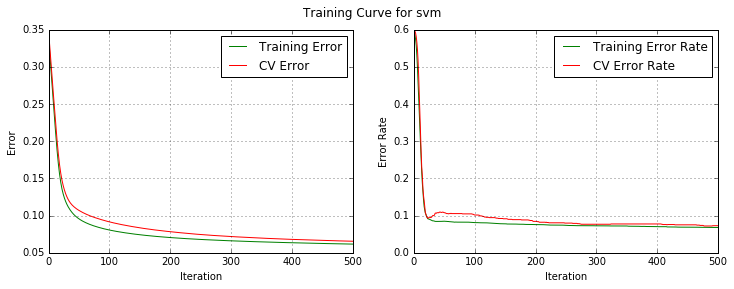

***** 10000 0.4
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0795544172351  Highest Training Accuracy :  0.934009573741
Best Development Error:  0.083692825135  Highest Development Accuracy :  0.927906976744
**************************************************
Current C is  0.4


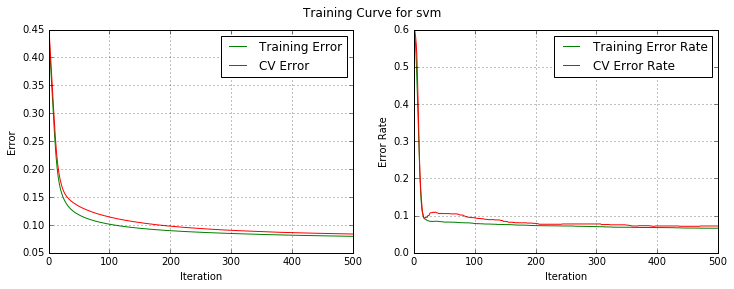

***** 10000 0.5
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0975698488123  Highest Training Accuracy :  0.935377250969
Best Development Error:  0.101845087714  Highest Development Accuracy :  0.927906976744
**************************************************
Current C is  0.5


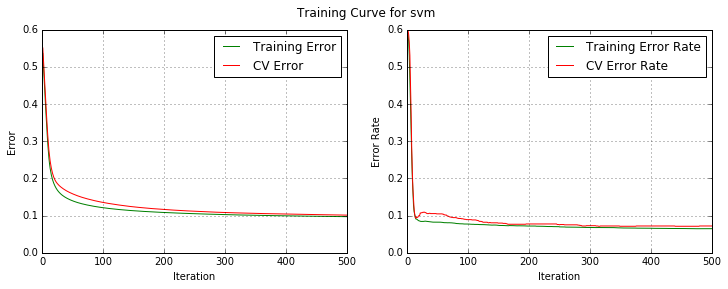

***** 10000 0.6
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.114814474761  Highest Training Accuracy :  0.936516981992
Best Development Error:  0.118616469079  Highest Development Accuracy :  0.927906976744
**************************************************
Current C is  0.6


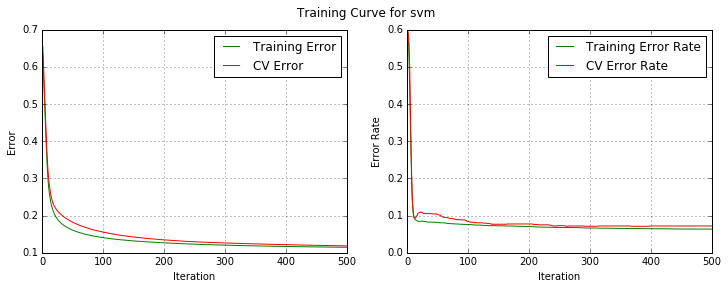

***** 10000 0.7
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.132908726782  Highest Training Accuracy :  0.936972874402
Best Development Error:  0.136617291866  Highest Development Accuracy :  0.929457364341
**************************************************
Current C is  0.7


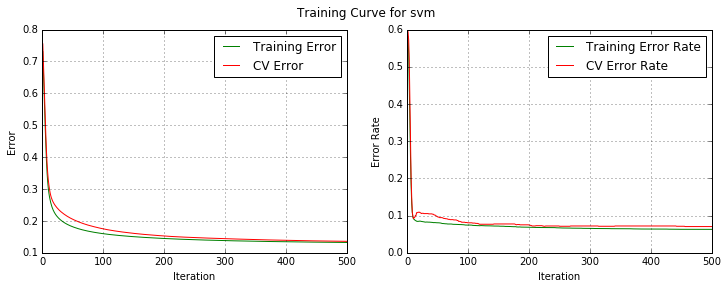

***** 10000 0.8
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.150890048554  Highest Training Accuracy :  0.937086847504
Best Development Error:  0.154518658098  Highest Development Accuracy :  0.93023255814
**************************************************
Current C is  0.8


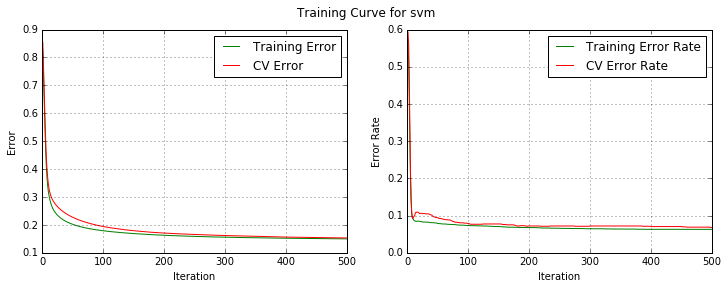

***** 10000 0.9
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.167552004627  Highest Training Accuracy :  0.937200820606
Best Development Error:  0.170910031039  Highest Development Accuracy :  0.932558139535
**************************************************
Current C is  0.9


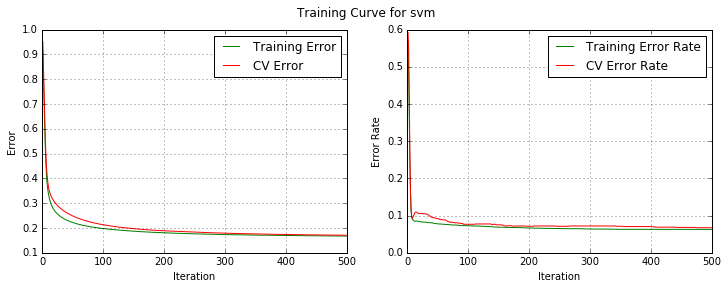

***** 10000 1.0
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.185420868562  Highest Training Accuracy :  0.937542739913
Best Development Error:  0.188614853572  Highest Development Accuracy :  0.931782945736
**************************************************
Current C is  1.0


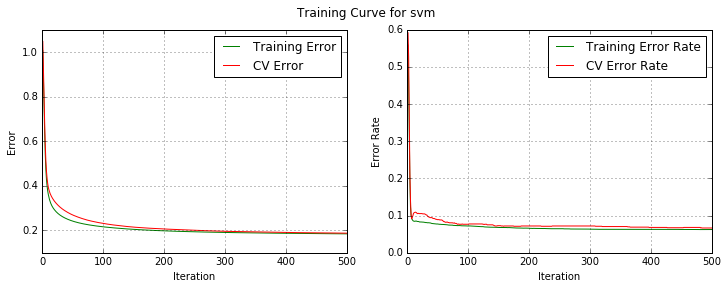

In [11]:
# #########################################################
# # Figure 2: Error curve for SVM
listSeed = [10, 100, 1000, 10000]
listC = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
learning_rate = 0.05
svm_train_Acc = []
svm_dev_Acc = []
for randomSeed in listSeed:
    for C in listC:
        svm = GDclassifier(loss='svm', learning_rate=learning_rate, iteration=500, 
                           C=C, CV=True, showFreq=0, randomSeed=randomSeed)
        print('*' * 5, randomSeed, C)
        svm.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
        # find the best parameters
        bestMSE_svm, bestAcc_svm, bestW_svm = svm.getBest('Accuracy')
        devMSE, devAcc = svm.evaluate(devFeature, devLabel, bestW_svm)
        svm_train_Acc.append(bestAcc_svm)
        svm_dev_Acc.append(devAcc)

        print('*' * 50)
        print("Current C is ", C)
        fig, ax = svm.plot(ylog=False, category='Error Rate', figsize=(12, 4))
        plt.show()

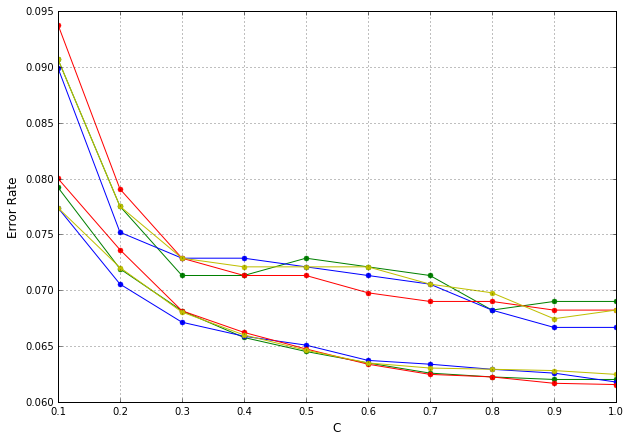

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))
color = ['g', 'b', 'r', 'y']
N = 10
for i in range(4):
    ax.plot(listC, 1 - np.array(svm_train_Acc[i*N:(i+1)*N]), '.-', color=color[i],
            markersize=10, linewidth=1, label='Training Error Rate')
    ax.plot(listC, 1 - np.array(svm_dev_Acc[i*N:(i+1)*N]), '.-', color=color[i],
            markersize=10, linewidth=1, label='Development Error Rate')
# ax.set_title('Comparison of SVM Classifier with Different C', fontsize=14)
ax.set_xlabel('C', fontsize=12)
ax.set_ylabel('Error Rate', fontsize=12)
# ax.legend(loc=1, fontsize=12)
ax.grid('on')

fig.savefig('./result/svm_comparison2.pdf')
plt.show()

In [13]:
#########################################################
# Part 3: Comparison of testing error for 4 classifiers
print('*' * 40)
print('Part 3: Comparison of testing error for 4 classifiers')

****************************************
Part 3: Comparison of testing error for 4 classifiers


Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0796855000586  Highest Training Accuracy :  0.934807385457
Best Development Error:  0.0715244240869  Highest Development Accuracy :  0.935658914729
**************************************************
Test Error for Linear Classifier: 	 0.0314814814815


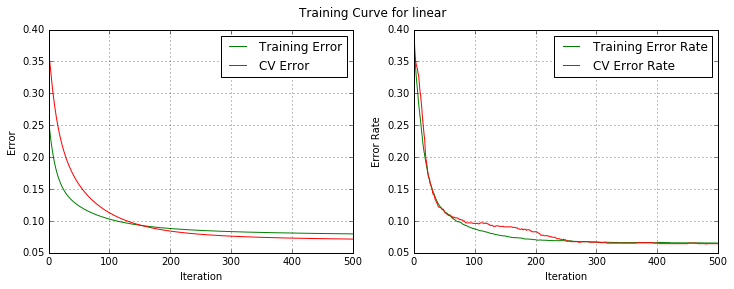

In [14]:
randomSeed = None
# Linear error
linear = GDclassifier(loss='linear', learning_rate=0.01, iteration=500, 
                      C=None, CV=True, showFreq=0, randomSeed=randomSeed)
linear.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
# find the best parameters
bestMSE_linear, bestAcc_linear, bestW_linear = linear.getBest('Accuracy')
evalMSE_linear, evalAcc_linear = linear.evaluate(evalFeature, evalLabel, bestW_linear)
print('*' * 50)
print("Test Error for Linear Classifier: \t", 1 - evalAcc_linear)
fig, ax = linear.plot(ylog=False, category='Error Rate', figsize=(12, 4))

Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0539621101345  Highest Training Accuracy :  0.936972874402
Best Development Error:  0.05548540854  Highest Development Accuracy :  0.926356589147
**************************************************
Test Error for Logistic Classifier: 	 0.0407407407407


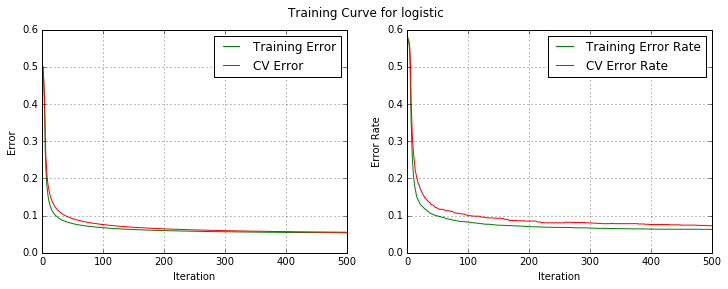

In [15]:
# Logistic error
randomSeed = 2012
logistic = GDclassifier(loss='logistic', learning_rate=0.5, iteration=500, 
                        C=None, CV=True, showFreq=0, randomSeed=randomSeed)
logistic.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
# find the best parameters
bestMSE_logistic, bestAcc_logistic, bestW_logistic = logistic.getBest('Accuracy')
evalMSE_logistic, evalAcc_logistic = logistic.evaluate(evalFeature, evalLabel, bestW_logistic)
print('*' * 50)
print("Test Error for Logistic Classifier: \t", 1 - evalAcc_logistic)
fig, ax = logistic.plot(ylog=False, category='Error Rate', figsize=(12, 4))

Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0228963358055  Highest Training Accuracy :  0.918965124231
Best Development Error:  0.0265887721782  Highest Development Accuracy :  0.893798449612
**************************************************
Test Error for Perceptron Classifier: 	 0.0537037037037


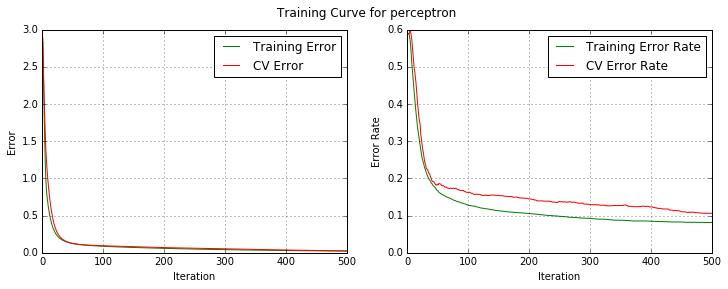

In [16]:
# Perceptron error
randomSeed = 2015
perceptron = GDclassifier(loss='perceptron', learning_rate=0.05, iteration=500, 
                          C=None, CV=True, showFreq=0, randomSeed=randomSeed)
perceptron.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
# find the best parameters
bestMSE_perceptron, bestAcc_perceptron, bestW_perceptron = perceptron.getBest('Accuracy')
evalMSE_perceptron, evalAcc_perceptron = perceptron.evaluate(evalFeature, evalLabel, bestW_perceptron)
print('*' * 50)
print("Test Error for Perceptron Classifier: \t", 1 - evalAcc_perceptron)
fig, ax = perceptron.plot(ylog=False, category='Error Rate', figsize=(12, 4))

Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.184746778551  Highest Training Accuracy :  0.937656713016
Best Development Error:  0.186790215407  Highest Development Accuracy :  0.934108527132
**************************************************
Test Error for Linear SVM Classifier: 	 0.0376543209877


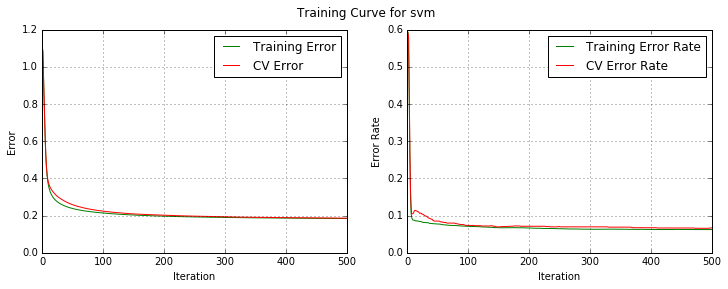

In [17]:
# SVM error
randomSeed = 2016
svm = GDclassifier(loss='svm', learning_rate=0.05, iteration=500, 
                   C=1, CV=True, showFreq=0, randomSeed=randomSeed)
svm.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
# find the best parameters
bestMSE_svm, bestAcc_svm, bestW_svm = svm.getBest('Accuracy')
evalMSE_svm, evalAcc_svm = svm.evaluate(evalFeature, evalLabel, bestW_svm)
print('*' * 50)
print("Test Error for Linear SVM Classifier: \t", 1 - evalAcc_svm)
fig, ax = svm.plot(ylog=False, category='Error Rate', figsize=(12, 4))

In [18]:
#########################################################
# Part 4: PCA (in 17 dimensions)
print('*' * 40)
print('Part 4: PCA')

# define features for PCA analysis
pcaFeature = trainFeature
pcaLabel = trainLabel

# perform PCA decomposition
pca = PCA(n=2, whiten=False)
pca.fit(pcaFeature)
eigenvector, variance, mean = pca.getResult()

# project onto the first two principal components
projection = pca.transform(pcaFeature - mean)

# Randomly select 300 points from training set
index = np.random.choice(range(0, len(trainFeature)), size=300, replace=False)

# select features and labels
selectedFeature = projection[index, :]
selectedLabel = pcaLabel[index, 0]

# define ee feature and eh feature
eeFeature = selectedFeature[selectedLabel == 0]
ehFeature = selectedFeature[selectedLabel == 1]

****************************************
Part 4: PCA
Keep the first 2 principal components


In [19]:
# transform the w onto PCA space
wLinear = pca.transform(pcaW_linear.T)[0, :]
wLogistic = pca.transform(pcaW_logistic.T)[0, :]
wPerceptron = pca.transform(pcaW_perceptron.T)[0, :]
wSvm = pca.transform(pcaW_svm.T)[0, :]

In [20]:
# calculate the boundary
x = np.linspace(-15, 30, 100)
yLinear = (- wLinear[0] * x) / wLinear[1]
yLogistic = (- wLogistic[0] * x) / wLogistic[1]
yPerceptron = (- wPerceptron[0] * x) / wPerceptron[1]
ySvm = (- wSvm[0] * x) / wSvm[1]

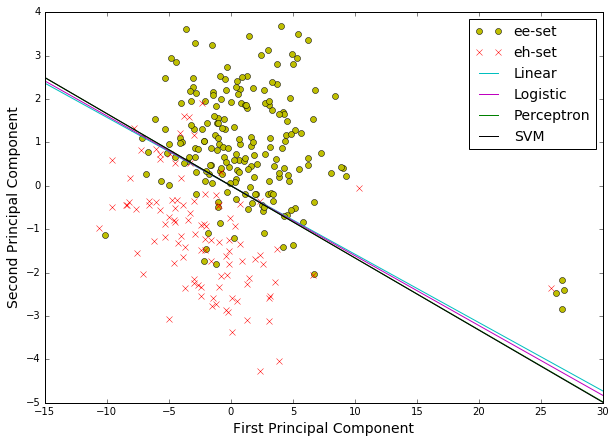

In [21]:
# plot the projection
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(eeFeature[:, 0], eeFeature[:, 1], 'yo', label='ee-set')
ax.plot(ehFeature[:, 0], ehFeature[:, 1], 'rx', label='eh-set')
ax.plot(x, yLinear, 'c-', label='Linear')
ax.plot(x, yLogistic, 'm-', label='Logistic')
ax.plot(x, yPerceptron, 'g-', label='Perceptron')
ax.plot(x, ySvm, 'k-', label='SVM')
ax.set_xlabel('First Principal Component', fontsize=14)
ax.set_ylabel('Second Principal Component', fontsize=14)
ax.legend(fontsize=14)

fig.savefig('./result/PCA.pdf')
plt.show()

In [22]:
#########################################################
# Part 5: TensorFlow Analysis
print('*' * 40)
print('Part 5: TensorFlow Analysis')

****************************************
Part 5: TensorFlow Analysis


In [23]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw1train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw1dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw1eval_labels.txt', './data/')

# One-Hot-Encode for labels
trainLabel = oneHotEncoder(trainLabel)
devLabel = oneHotEncoder(devLabel)
evalLabel = oneHotEncoder(evalLabel)

Tensor Flow Analysis
1000th Iteration, Training Error Rate: 	 0.0655345320702
1000th Iteration, Devalopment Error Rate: 	 0.0751938223839
1000th Iteration, Evaluation Error Rate: 	 0.0370370149612


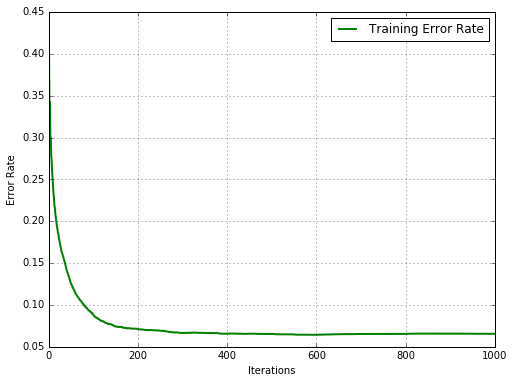

In [24]:
# begin the session
sess = tf.Session()

# Create the model
x = tf.placeholder(tf.float32, [None, 16])
W = tf.Variable(tf.random_normal([16, 2]))
b = tf.Variable(tf.random_normal([2]))
# W = tf.Variable(tf.zeros([16, 2]))
# b = tf.Variable(tf.zeros([2]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# Define loss
y_ = tf.placeholder(tf.float32, [None, 2])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# Define optimizer
learning_rate = 0.2  # learning rate
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

# Train
init = tf.initialize_all_variables()  # initialize the model
sess.run(init)

# Test trained model on training set
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# define accuracy variable to record the process
trainAcc = []
devAcc = []
evalAcc = []

max_iteration = 1000
for i in range(max_iteration):
    batch_xs, batch_ys = trainFeature, trainLabel
    sess.run(train_step, {x: batch_xs, y_: batch_ys})
    # keep recording the accuracy
    trainAcc.append(sess.run(accuracy, feed_dict={x: trainFeature, y_: trainLabel}))
    devAcc.append(sess.run(accuracy, feed_dict={x: devFeature, y_: devLabel}))
    evalAcc.append(sess.run(accuracy, feed_dict={x: evalFeature, y_: evalLabel}))

# Test trained model on evaluation set
print('Tensor Flow Analysis')
print(str(max_iteration) + "th Iteration, Training Error Rate: \t", 
      1 - sess.run(accuracy, feed_dict={x: trainFeature, y_:trainLabel}))
print(str(max_iteration) + "th Iteration, Devalopment Error Rate: \t", 
      1 - sess.run(accuracy, feed_dict={x: devFeature, y_:devLabel}))
print(str(max_iteration) + "th Iteration, Evaluation Error Rate: \t", 
      1 - sess.run(accuracy, feed_dict={x: evalFeature, y_: evalLabel}))

# close the session
sess.close()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, max_iteration + 1), 1 - np.array(trainAcc), 'g', linewidth=2, label='Training Error Rate')
# ax.plot(range(1, max_iteration + 1), 1 - np.array(devAcc), 'r', label='Development Error Rate')
# ax.plot(range(1, max_iteration + 1), 1 - np.array(evalAcc), 'b', label='Evaluation Error Rate')
ax.set_xlabel('Iterations', fontsize=10)
ax.set_ylabel('Error Rate', fontsize=10)
# ax.set_title('Convergence of Error Rate (TensorFlow)', fontsize=14)
ax.legend(loc=1, fontsize=12)
ax.grid('on')

fig.savefig('./result/tensorflow.pdf')
plt.show()